GAIZKIA ADELINE ATMAKA


2501972493 LA05


FINAL EXAM DEEP LEARNING NO. 1 (LSTM)

**Import Library yang dibutuhkan**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, Model
from keras.layers import LSTM, Dense, Attention, Flatten, Input
import matplotlib.pyplot as plt

In [ ]:
!pip install keras-self-attention
import tensorflow as tf
from keras_self_attention import SeqSelfAttention

**Import Dataset**

In [ ]:
df = pd.read_csv('X.csv')

df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-09-29,432.588074,436.787964,407.388763,432.588074,304.904572,7.618067e+07
2005-09-30,457.787384,457.787384,432.588074,457.787384,322.666016,1.054940e+08
2005-10-03,470.387024,474.586914,440.987854,470.387024,331.546692,5.971296e+07
2005-10-04,474.586914,482.986694,466.187164,474.586914,334.506927,5.623667e+07
2005-10-05,482.986694,482.986694,466.187164,482.986694,340.427429,3.131932e+07
...,...,...,...,...,...,...
2021-01-28,2470.000000,2570.000000,2380.000000,2380.000000,2380.000000,7.318549e+08
2021-01-29,2370.000000,2440.000000,2220.000000,2220.000000,2220.000000,4.503212e+08
2021-02-01,2090.000000,2640.000000,2070.000000,2600.000000,2600.000000,2.186653e+09


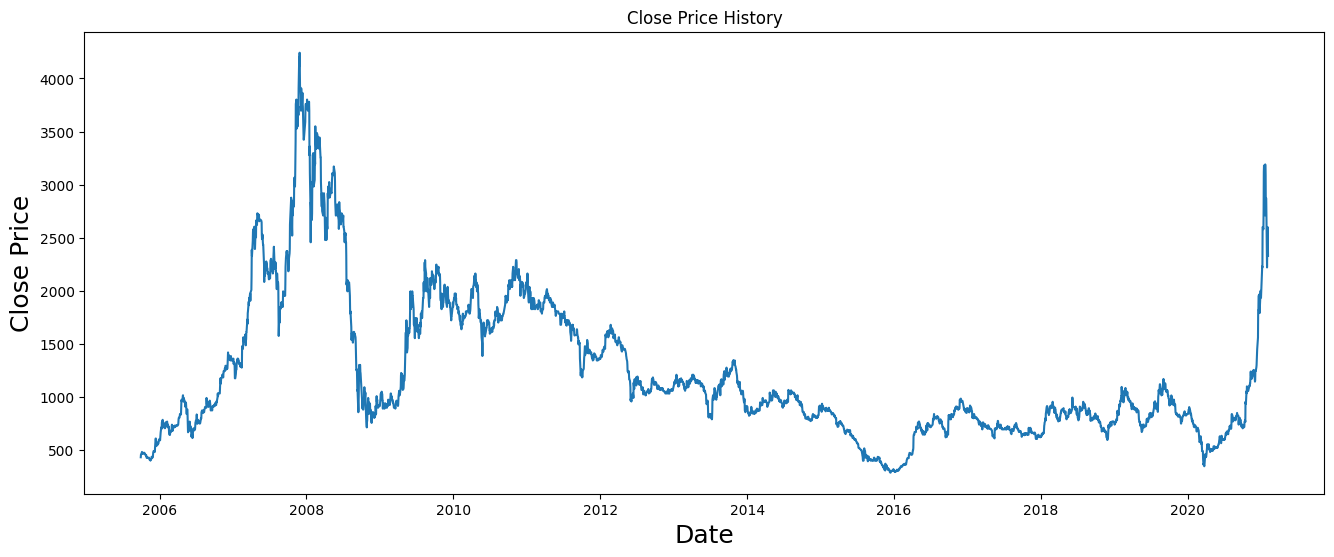

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

Normalisasi kolom 'Close'

In [ ]:
scaler = MinMaxScaler()
df['Close_normalized'] = scaler.fit_transform(df[['Close']])

Create a function untuk create sequences (Time series)

In [ ]:
def create_sequences(data, window_size):
    sequences = []
    targets = []
    for i in range(len(data) - window_size):
        sequence = data[i:(i + window_size)]
        target = data[i + window_size]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

window_size = 5
horizon = 1
X, y = create_sequences(df['Close_normalized'].values, window_size)

Split the data into training 80%, validation 10% , and test sets 10%

In [ ]:
split_index_train = int(0.8 * len(X))
split_index_val = int(0.9 * len(X))

X_train, X_val, X_test = X[:split_index_train], X[split_index_train:split_index_val], X[split_index_val:]
y_train, y_val, y_test = y[:split_index_train], y[split_index_train:split_index_val], y[split_index_val:]

Create Model (Base LSTM) & Compile

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

Reshape input data agar bisa di fit (diterima model)

In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

Train Model

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
96/96 [==============================] - 2s 7ms/step - loss: 0.0203 - val_loss: nan
Epoch 2/50
96/96 [==============================] - 1s 5ms/step - loss: 3.7343e-04 - val_loss: nan
Epoch 3/50
96/96 [==============================] - 1s 5ms/step - loss: 3.4283e-04 - val_loss: nan
Epoch 4/50
96/96 [==============================] - 0s 5ms/step - loss: 3.2629e-04 - val_loss: nan
Epoch 5/50
96/96 [==============================] - 1s 5ms/step - loss: 3.3235e-04 - val_loss: nan
Epoch 6/50
96/96 [==============================] - 1s 10ms/step - loss: 3.1436e-04 - val_loss: nan
Epoch 7/50
96/96 [==============================] - 1s 10ms/step - loss: 3.1565e-04 - val_loss: nan
Epoch 8/50
96/96 [==============================] - 1s 9ms/step - loss: 3.0961e-04 - val_loss: nan
Epoch 9/50
96/96 [==============================] - 1s 9ms/step - loss: 3.1194e-04 - val_loss: nan
Epoch 10/50
96/96 [==============================] - 1s 10ms/step - loss: 3.1218e-04 - val_loss: nan
Epoch 11/5

Evaluate & predict model dengan test set

In [ ]:
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

12/12 [==============================] - 0s 3ms/step - loss: 3.2441e-04
Test Loss: 0.00032440669019706547


In [ ]:
y_pred = model.predict(X_test)

12/12 [==============================] - 0s 4ms/step


Lakukan inverse transform ke original scale

In [ ]:
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

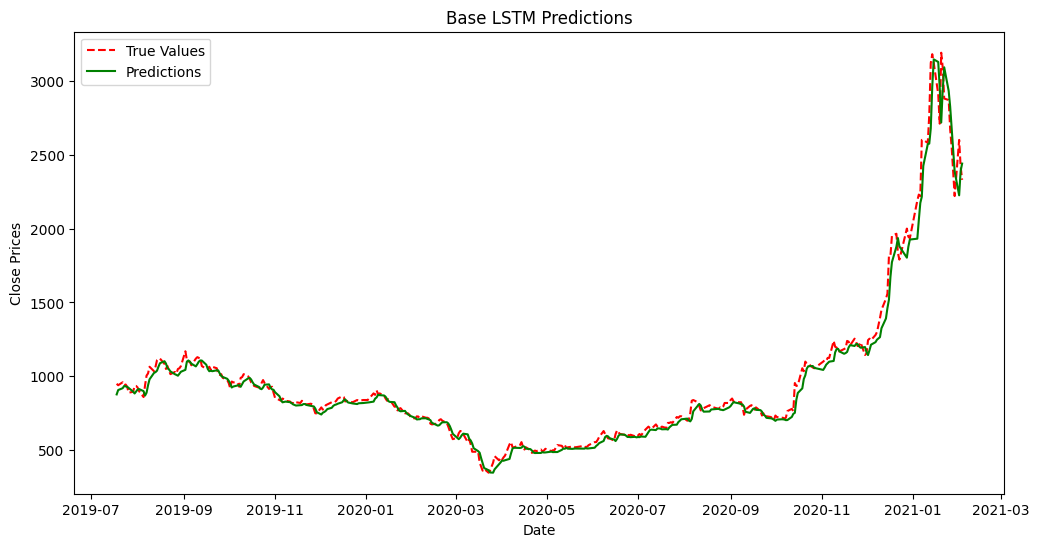

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test_original):], y_test_original, label='True Values', linestyle='--', color='red')
plt.plot(df.index[-len(y_pred_original):], y_pred_original, label='Predictions', color='green')
plt.title('Base LSTM Predictions')
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.legend()
plt.show()

SeqSelfAttention LSTM Model

In [ ]:
from keras.layers import Reshape

model1 = Sequential()
model1.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(window_size, 1)))
model1.add(Reshape((5, 50)))
model1.add(SeqSelfAttention(attention_activation='relu'))
model1.add(Flatten())
model1.add(Dense(1))
model1.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


Layer LSTM: digunakan saat memakai model LSTM. Lapisan ini memiliki 50 unit yang menggunakan aktivasi ReLU.
Layer Reshape: digunakan untuk mengubah output dari Layer LSTM menjadi matriks 5x50.
Layer SeqSelfAttention: digunakan untuk mempelajari ketergantungan antar sequence. Lapisan ini menggunakan aktivasi ReLU.
Layer Flatten: digunakan untuk mengubah output dari lapisan SeqSelfAttention menjadi vektor.
Layer Dense: digunakan untuk menghasilkan output dari model. Layer ini memiliki satu neuron.

Cara SeqSelfAttention bekerja:

SeqSelfAttention bekerja dengan menghitung ketergantungan antarsequence. Ketergantungan ini dihitung dengan menggunakan attention function. Fungsi ini menerima sebagai input vektor representasi dari setiap elemen dalam sequence. Vektor representasi ini dihasilkan oleh lapisan LSTM.

Lalu kemudian menghitung bobot untuk setiap representasi vektor. Bobot ini menunjukkan seberapa penting representasi vektor tersebut untuk menghasilkan output dari model. Output dari fungsi perhatian kemudian digunakan untuk menjumlahkan vektor representasi dari semua elemen dalam sequence.

In [ ]:
model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
96/96 [==============================] - 4s 15ms/step - loss: 0.0128 - val_loss: nan
Epoch 2/50
96/96 [==============================] - 1s 13ms/step - loss: 5.2531e-04 - val_loss: nan
Epoch 3/50
96/96 [==============================] - 1s 8ms/step - loss: 4.7111e-04 - val_loss: nan
Epoch 4/50
96/96 [==============================] - 1s 7ms/step - loss: 4.7133e-04 - val_loss: nan
Epoch 5/50
96/96 [==============================] - 1s 7ms/step - loss: 4.5047e-04 - val_loss: nan
Epoch 6/50
96/96 [==============================] - 1s 9ms/step - loss: 4.4144e-04 - val_loss: nan
Epoch 7/50
96/96 [==============================] - 1s 12ms/step - loss: 4.4045e-04 - val_loss: nan
Epoch 8/50
96/96 [==============================] - 1s 12ms/step - loss: 4.4102e-04 - val_loss: nan
Epoch 9/50
96/96 [==============================] - 1s 14ms/step - loss: 4.3994e-04 - val_loss: nan
Epoch 10/50
96/96 [==============================] - 2s 16ms/step - loss: 4.4244e-04 - val_loss: nan
Epoch 1

In [ ]:
loss1 = model1.evaluate(X_test, y_test)
print(f'Test Loss: {loss1}')

12/12 [==============================] - 0s 5ms/step - loss: 4.3359e-04
Test Loss: 0.00043358749826438725


In [ ]:
y_pred1 = model1.predict(X_test)
y_pred1

12/12 [==============================] - 0s 4ms/step


array([[0.15155523],
       [0.15589373],
       [0.16095   ],
       [0.16535209],
       [0.16699521],
       [0.16887838],
       [0.16746882],
       [0.16532762],
       [0.16128214],
       [0.16016953],
       [0.16120893],
       [0.16217469],
       [0.16203323],
       [0.1596492 ],
       [0.15825394],
       [0.162204  ],
       [0.17036659],
       [0.17894869],
       [0.18699071],
       [0.19243683],
       [0.1963025 ],
       [0.20268813],
       [0.20640692],
       [0.20813961],
       [0.20619357],
       [0.20255877],
       [0.19903381],
       [0.19494073],
       [0.19108625],
       [0.18970212],
       [0.18946041],
       [0.19052048],
       [0.19388784],
       [0.20020832],
       [0.20677672],
       [0.21004505],
       [0.2087739 ],
       [0.20879981],
       [0.20653942],
       [0.20790438],
       [0.21080004],
       [0.21143131],
       [0.21050736],
       [0.20606296],
       [0.20079915],
       [0.19829614],
       [0.19594507],
       [0.195

In [ ]:
y_pred_original1 = scaler.inverse_transform(y_pred1)
y_test_original1 = scaler.inverse_transform(y_test.reshape(-1, 1))

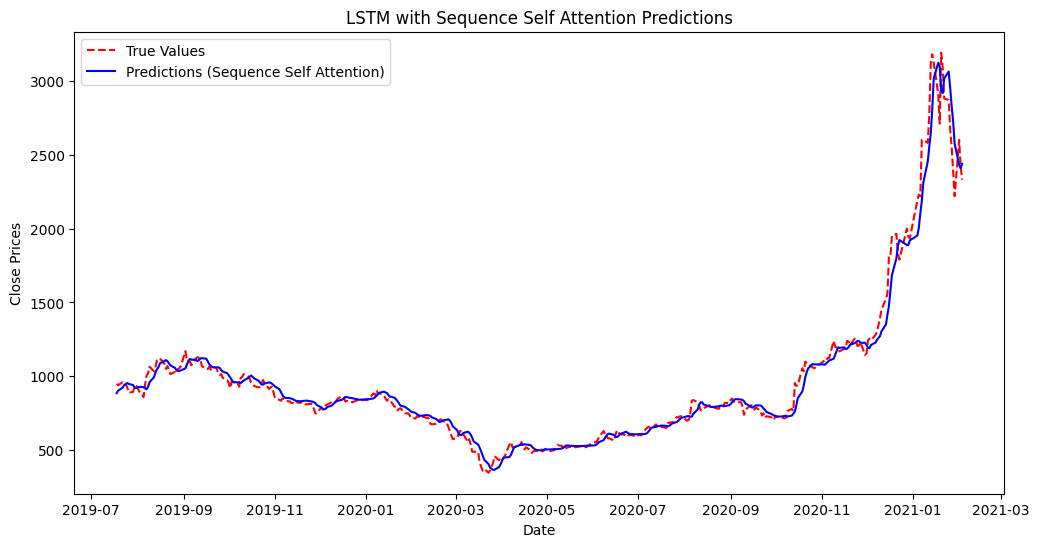

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test_original):], y_test_original, label='True Values', linestyle='--', color='red')
plt.plot(df.index[-len(y_pred_original1):], y_pred_original1, label='Predictions (Sequence Self Attention)', color='blue')
plt.title('LSTM with Sequence Self Attention Predictions')
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.legend()
plt.show()

Model Functional API

In [ ]:
input_layer = Input(shape=(window_size, 1))
lstm_output = LSTM(50, return_sequences=True)(input_layer)
attention_output = Attention(use_scale=True)([lstm_output, lstm_output])
flatten_output = Flatten()(attention_output)
output_layer = Dense(1)(flatten_output)

model2 = Model(inputs=input_layer, outputs=output_layer)
model2.compile(optimizer='adam', loss='mse')

In [ ]:
# Train the model
model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
96/96 [==============================] - 3s 11ms/step - loss: 0.0122 - val_loss: nan
Epoch 2/50
96/96 [==============================] - 1s 6ms/step - loss: 6.2437e-04 - val_loss: nan
Epoch 3/50
96/96 [==============================] - 1s 5ms/step - loss: 5.3371e-04 - val_loss: nan
Epoch 4/50
96/96 [==============================] - 1s 6ms/step - loss: 4.8416e-04 - val_loss: nan
Epoch 5/50
96/96 [==============================] - 1s 6ms/step - loss: 4.6587e-04 - val_loss: nan
Epoch 6/50
96/96 [==============================] - 1s 6ms/step - loss: 4.5465e-04 - val_loss: nan
Epoch 7/50
96/96 [==============================] - 1s 6ms/step - loss: 4.5868e-04 - val_loss: nan
Epoch 8/50
96/96 [==============================] - 1s 6ms/step - loss: 4.5230e-04 - val_loss: nan
Epoch 9/50
96/96 [==============================] - 1s 6ms/step - loss: 4.5164e-04 - val_loss: nan
Epoch 10/50
96/96 [==============================] - 1s 6ms/step - loss: 4.5011e-04 - val_loss: nan
Epoch 11/50


In [ ]:
loss2 = model2.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {loss2}')

12/12 [==============================] - 0s 4ms/step - loss: 4.6708e-04
Test Loss (MSE): 0.0004670794296544045


In [ ]:
y_pred2 = model2.predict(X_test)
# y_pred2

12/12 [==============================] - 0s 3ms/step


In [ ]:
y_pred_original2 = scaler.inverse_transform(y_pred2)
y_test_original2 = scaler.inverse_transform(y_test.reshape(-1, 1))

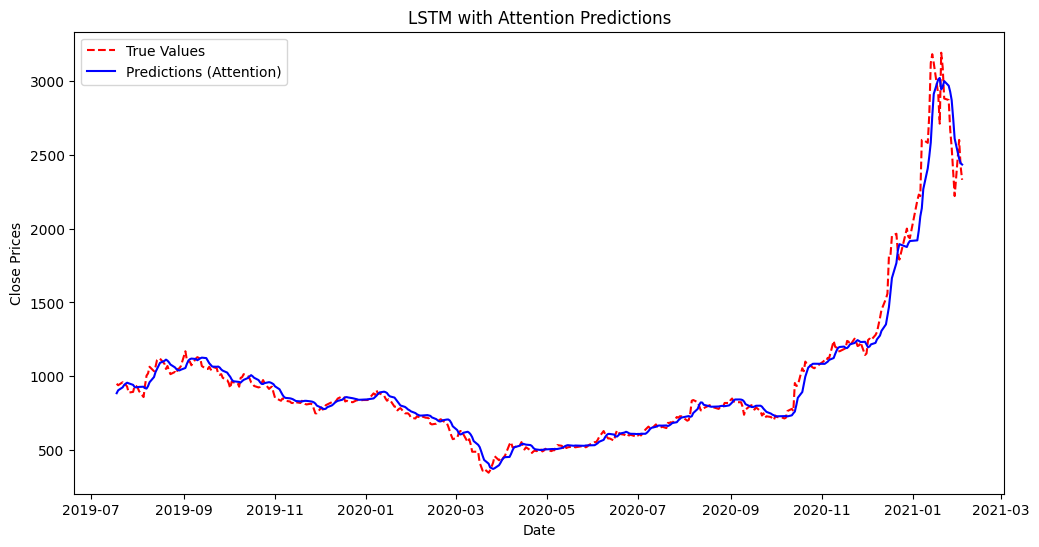

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test_original):], y_test_original, label='True Values', linestyle='--', color='red')
plt.plot(df.index[-len(y_pred_original2):], y_pred_original2, label='Predictions (Attention)', color='blue')
plt.title('LSTM with Attention Predictions')
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.legend()
plt.show()

**Calculate RMSE, MSE, and R-squared**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

print("====== Base LSTM =======")
rmse = sqrt(mean_squared_error(y_test_original, y_pred_original))
mse = mean_squared_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R^2): {r2}')

print("\n====== LSTM with SeqSelfAttention =======")
rmse1 = sqrt(mean_squared_error(y_test_original1, y_pred_original1))
mse1 = mean_squared_error(y_test_original1, y_pred_original1)
r2_1 = r2_score(y_test_original1, y_pred_original1)

print(f'Root Mean Squared Error (RMSE): {rmse1}')
print(f'Mean Squared Error (MSE): {mse1}')
print(f'R-squared (R^2): {r2_1}')

====== Base LSTM =======
Root Mean Squared Error (RMSE): 71.23256079344354
Mean Squared Error (MSE): 5074.07771719163
R-squared (R^2): 0.9811606764840868

====== LSTM with SeqSelfAttention =======
Root Mean Squared Error (RMSE): 82.35159153112147
Mean Squared Error (MSE): 6781.784627708677
R-squared (R^2): 0.9748202054170813


Nilai RMSE dan MSE yang lebih rendah menunjukkan kinerja model yang lebih baik dalam akurasi prediksi.
Nilai R-squared yang lebih tinggi (mendekati 1)menunjukkan kesesuaian yang baik antara prediksi model dan data sebenarnya.

====Base LSTM:
RMSE Menunjukkan kesalahan prediksi rata-rata sekitar 71,23 unit untuk target
R-squared menunjukkan kesesuaian model yang kuat sebesar 98,1% variasi

===LSTM SeqSelfAttention:
RMSE menunjukkan kesalahan prediksi rata-rata yang sedikit lebih tinggi dibandingkan dengan base LSTM.
MSE (6781,78) menunjukkan bahwa kesalahan lebih tinggi dari base LSTM.
R-squared menunjukkan varians yang dijelaskan lebih sedikit dari base LSTM.

Kesimpulan:
Base LSTM lebih memiliki performa yang tinggi dibanding dengan LSTM dengan SeqSelfAttention dalam hal RMSE dan MSE, menunjukkan prediksi yang lebih akurat.
Base LSTM juga memiliki nilai R-squared yang sedikit lebih tinggi, menunjukkan kesesuaian yang sedikit lebih baik dengan data.

Plot predictions dari 2 model dengan actual values

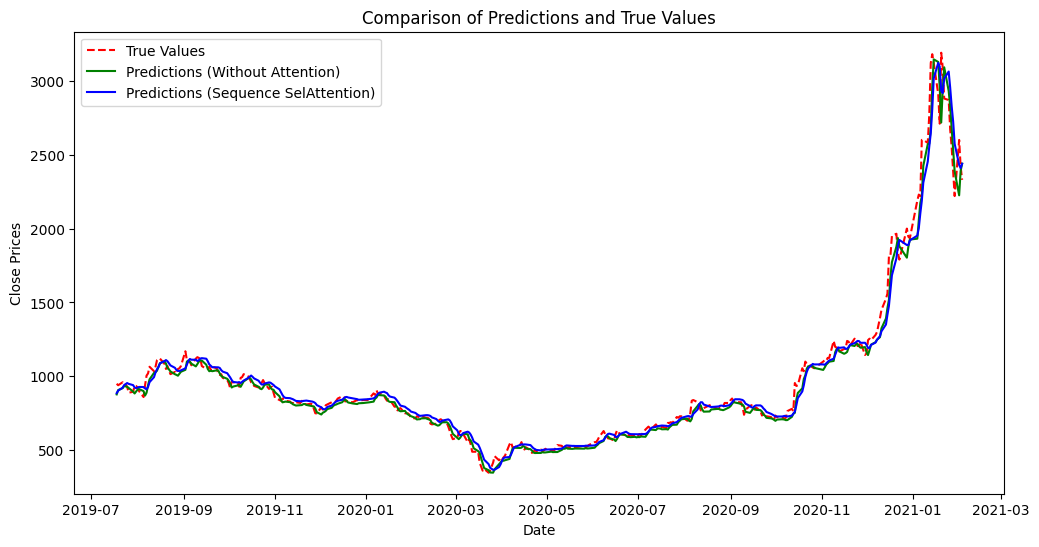

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[-len(y_test_original):], y_test_original, label='True Values', linestyle='--', color='red')
plt.plot(df.index[-len(y_pred_original):], y_pred_original, label='Predictions (Without Attention)', color='green')
plt.plot(df.index[-len(y_pred_original1):], y_pred_original1, label='Predictions (Sequence SelAttention)', color='blue')

plt.title('Comparison of Predictions and True Values')
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.legend()
plt.show()

Dapat dilihat dari hasil line chart diatas, bahwa model tanpa attention dan model dengan seqsequenceAttention dapat memprediksi dengan sangat baik. Ditandai dengan nilai yang sangat berdekatan dengan true value